In [1]:
import pickle
import warnings
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from utility_functions import model_evaluate, preprocess_data

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from mlxtend.classifier import StackingCVClassifier

In [2]:
warnings.filterwarnings("ignore")
pd.set_option("display.max_colwidth", 200)
sns.set_context("talk", font_scale=1)

In [115]:
data = pd.read_pickle("data/processed_training_data.pkl")
val_data = pd.read_pickle("data/processed_validation_data.pkl")

In [116]:
data.head()

,Tweet,Depressive
0,severely depressed summer seriously thought haveis not depression anymore surpassed first holder new worse mental illness,1
1,like wake panic knowing thing get done today already dreading moment foot touch ground mentalhealthissues anxienty depression,1
2,bpd anxiety depression,1
3,depression make forget trying not gain weight,1
4,really survive depression,1


In [117]:
data.tail()

,Tweet,Depressive
1081861,woke no school best feeling ever,0
1081862,thewdb com cool hear old walt interview,0
1081863,ready mojo makeover ask detail,0
1081864,happy th birthday boo time tupac amaru shakur,0
1081865,happy charitytuesday,0


In [118]:
X_train, X_test, y_train, y_test = train_test_split(data["Tweet"], data["Depressive"]
                                                    , test_size=.10
                                                    , stratify=data["Depressive"]
                                                    , random_state=23)

In [8]:
mnb_classifier = Pipeline([('vect', CountVectorizer()),
                      ('clf', MultinomialNB())])

In [9]:
parameters = {
                    'vect__ngram_range': [(1, 1), (1, 2)],
                    'vect__max_features': [200000, 500000, 1000000],
                    'clf__alpha': (0.05, 1.0, 10, 100, 1000)
            }

In [10]:
start = time.time()
mnb_gs_clf = GridSearchCV(mnb_classifier, parameters, scoring='recall', cv=5, verbose=3)
mnb_gs_clf.fit(X_train, y_train)
mnb_time = (time.time()-start) / 60
print("MNB model training time (mins) : ", mnb_time)

best_parameters = mnb_gs_clf.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END clf__alpha=0.05, vect__max_features=200000, vect__ngram_range=(1, 1);, score=0.821 total time=  10.2s
[CV 2/5] END clf__alpha=0.05, vect__max_features=200000, vect__ngram_range=(1, 1);, score=0.819 total time=  11.1s
[CV 3/5] END clf__alpha=0.05, vect__max_features=200000, vect__ngram_range=(1, 1);, score=0.818 total time=   9.5s
[CV 4/5] END clf__alpha=0.05, vect__max_features=200000, vect__ngram_range=(1, 1);, score=0.820 total time=   9.6s
[CV 5/5] END clf__alpha=0.05, vect__max_features=200000, vect__ngram_range=(1, 1);, score=0.818 total time=   9.6s
[CV 1/5] END clf__alpha=0.05, vect__max_features=200000, vect__ngram_range=(1, 2);, score=0.828 total time=  28.3s
[CV 2/5] END clf__alpha=0.05, vect__max_features=200000, vect__ngram_range=(1, 2);, score=0.825 total time=  28.2s
[CV 3/5] END clf__alpha=0.05, vect__max_features=200000, vect__ngram_range=(1, 2);, score=0.825 total time=  28.1s
[CV 4/5] END clf__

[CV 2/5] END clf__alpha=10, vect__max_features=500000, vect__ngram_range=(1, 1);, score=0.728 total time=  21.7s
[CV 3/5] END clf__alpha=10, vect__max_features=500000, vect__ngram_range=(1, 1);, score=0.725 total time=  21.5s
[CV 4/5] END clf__alpha=10, vect__max_features=500000, vect__ngram_range=(1, 1);, score=0.728 total time=  21.5s
[CV 5/5] END clf__alpha=10, vect__max_features=500000, vect__ngram_range=(1, 1);, score=0.725 total time=  21.3s
[CV 1/5] END clf__alpha=10, vect__max_features=500000, vect__ngram_range=(1, 2);, score=0.748 total time=  58.8s
[CV 2/5] END clf__alpha=10, vect__max_features=500000, vect__ngram_range=(1, 2);, score=0.746 total time=  58.5s
[CV 3/5] END clf__alpha=10, vect__max_features=500000, vect__ngram_range=(1, 2);, score=0.745 total time=  58.8s
[CV 4/5] END clf__alpha=10, vect__max_features=500000, vect__ngram_range=(1, 2);, score=0.748 total time=  58.6s
[CV 5/5] END clf__alpha=10, vect__max_features=500000, vect__ngram_range=(1, 2);, score=0.743 to

[CV 4/5] END clf__alpha=1000, vect__max_features=1000000, vect__ngram_range=(1, 1);, score=0.353 total time=   9.4s
[CV 5/5] END clf__alpha=1000, vect__max_features=1000000, vect__ngram_range=(1, 1);, score=0.351 total time=   9.4s
[CV 1/5] END clf__alpha=1000, vect__max_features=1000000, vect__ngram_range=(1, 2);, score=0.376 total time=  29.0s
[CV 2/5] END clf__alpha=1000, vect__max_features=1000000, vect__ngram_range=(1, 2);, score=0.375 total time=  28.8s
[CV 3/5] END clf__alpha=1000, vect__max_features=1000000, vect__ngram_range=(1, 2);, score=0.375 total time=  28.9s
[CV 4/5] END clf__alpha=1000, vect__max_features=1000000, vect__ngram_range=(1, 2);, score=0.371 total time=  28.6s
[CV 5/5] END clf__alpha=1000, vect__max_features=1000000, vect__ngram_range=(1, 2);, score=0.370 total time=  28.8s
MNB model training time (mins) :  79.40833715995153
	clf__alpha: 1.0
	vect__max_features: 200000
	vect__ngram_range: (1, 2)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96     87616
           1       0.83      0.83      0.83     20571

    accuracy                           0.94    108187
   macro avg       0.90      0.90      0.90    108187
weighted avg       0.94      0.94      0.94    108187



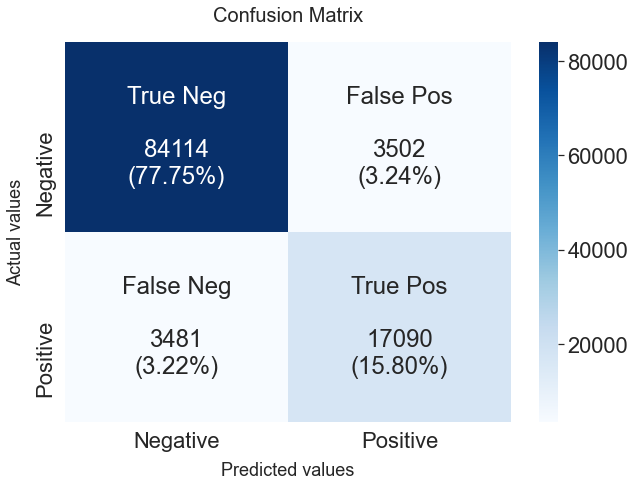

In [11]:
mnb_gs_clf_pred = pd.Series(model_evaluate(mnb_gs_clf, X_test, y_test))

In [143]:
vectorizer = CountVectorizer(ngram_range=(1, 2), max_features=200000, lowercase=False)
vectorizer.fit(X_train)

CountVectorizer(lowercase=False, max_features=200000, ngram_range=(1, 2))

In [144]:
len(vectorizer.get_feature_names())

200000

In [145]:
val_x = val_data.loc[:, ["Tweet"]]
val_y = val_data.loc[:, ["Depressive"]]

In [146]:
val_x.head()

,Tweet
0,today selfcare beauty amp laugh kung fu panda wellness joy laughter selfcare therapist philadelphia
1,get spend new year home alone lonely
2,depressed lonely stuck deep never ending hole sad
3,response someone saying dealing terrible person
4,apparently get free pas mentioning free badge day


In [147]:
val_y.head()

,Depressive
0,0
1,1
2,1
3,0
4,0


In [148]:
X_vec = vectorizer.transform(val_x.Tweet)

In [149]:
X_vec.shape

(3200, 200000)

In [150]:
X_vec = pd.DataFrame(X_vec.toarray())
X_vec.head()

MemoryError: Unable to allocate 4.77 GiB for an array with shape (3200, 200000) and data type int64

In [129]:
mnb_pred_val = pd.Series(model_evaluate(mnb_gs_clf, X_vec, val_y))

AttributeError: 'int' object has no attribute 'lower'